In [1]:
import pandas as pd
import numpy as np
from scalecast.Forecaster import Forecaster
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,7)})

In [2]:
#load data
data = pd.read_csv("..\..\Data\Day\S&P 500 Historical Data00-20.csv")

In [3]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/14/2019,"3,096.63","3,090.75","3,098.20","3,083.26",NaN,0.08%
1,11/13/2019,"3,094.04","3,084.18","3,098.06","3,078.80",NaN,0.07%
2,11/12/2019,"3,091.84","3,089.28","3,102.61","3,084.73",NaN,0.16%
3,11/11/2019,"3,087.01","3,080.33","3,088.33","3,075.82",NaN,-0.20%
4,11/08/2019,"3,093.08","3,081.25","3,093.09","3,073.58",NaN,0.26%


In [4]:
data['Timestamp'] = pd.DataFrame(data.Date)
data.Date = pd.to_datetime(data.Date)
data = data.sort_values(by=["Date"])
data.Price = data.Price.str.replace(',', '').astype(float) # Here price is equal to close
data.High = data.High.str.replace(',', '').astype(float)
data.Low = data.Low.str.replace(',', '').astype(float)
data.Open = data.Open.str.replace(',', '').astype(float)
data = data.drop("Vol.", axis = 1)

In [5]:
special_data = pd.DataFrame(data)

In [6]:
special_data = data[(data['Date'] > '2014-01-01') & (data['Date'] < '2015-01-01')]
special_data.index = data.index[:len(special_data)]

In [7]:
#change indexes
special_data.set_index('Date', inplace = True)

In [8]:
data.head(10)

,Date,Price,Open,High,Low,Change %,Timestamp
4999,2000-01-03,1455.2,1469.2,1478.0,1438.4,-0.95%,01/03/2000
4998,2000-01-04,1399.4,1455.2,1455.2,1397.4,-3.83%,01/04/2000
4997,2000-01-05,1402.1,1399.4,1413.3,1377.7,0.19%,01/05/2000
4996,2000-01-06,1403.5,1402.1,1411.9,1392.0,0.10%,01/06/2000
4995,2000-01-07,1441.5,1403.5,1441.5,1400.5,2.71%,01/07/2000
4994,2000-01-10,1457.6,1441.5,1464.4,1441.5,1.12%,01/10/2000
4993,2000-01-11,1438.6,1457.6,1458.8,1434.4,-1.30%,01/11/2000
4992,2000-01-12,1432.2,1439.1,1445.3,1427.3,-0.44%,01/12/2000
4991,2000-01-13,1449.7,1432.2,1454.6,1432.2,1.22%,01/13/2000
4990,2000-01-14,1465.2,1449.7,1473.0,1449.7,1.07%,01/14/2000


In [9]:
special_data.head(10)

,Price,Open,High,Low,Change %,Timestamp
Date,,,,,,
2014-01-02,1831.98,1845.86,1845.86,1827.74,-0.89%,01/02/2014
2014-01-03,1831.37,1833.21,1838.24,1829.13,-0.03%,01/03/2014
2014-01-06,1826.77,1832.31,1837.16,1823.73,-0.25%,01/06/2014
2014-01-07,1837.88,1828.71,1840.10,1828.71,0.61%,01/07/2014
2014-01-08,1837.49,1837.90,1840.02,1831.40,-0.02%,01/08/2014
2014-01-09,1838.13,1839.00,1843.23,1830.38,0.03%,01/09/2014
2014-01-10,1842.37,1840.06,1843.15,1832.43,0.23%,01/10/2014
2014-01-13,1819.20,1841.26,1843.45,1815.52,-1.26%,01/13/2014
2014-01-14,1838.88,1821.36,1839.26,1821.36,1.08%,01/14/2014


In [10]:
special_data['new_index'] = special_data.Price
special_data['new_date'] = special_data.Price
special_data.head()

,Price,Open,High,Low,Change %,Timestamp,new_index,new_date
Date,,,,,,,,
2014-01-02,1831.98,1845.86,1845.86,1827.74,-0.89%,01/02/2014,1831.98,1831.98
2014-01-03,1831.37,1833.21,1838.24,1829.13,-0.03%,01/03/2014,1831.37,1831.37
2014-01-06,1826.77,1832.31,1837.16,1823.73,-0.25%,01/06/2014,1826.77,1826.77
2014-01-07,1837.88,1828.71,1840.10,1828.71,0.61%,01/07/2014,1837.88,1837.88
2014-01-08,1837.49,1837.90,1840.02,1831.40,-0.02%,01/08/2014,1837.49,1837.49


In [11]:
import datetime

special_data.new_index[0] = 1388577600
special_data.new_date[0] = datetime.datetime.fromtimestamp(special_data.new_index[0]).strftime('%Y-%m-%d %H:%M:%S')
for i in range(len(special_data.new_index)):
    if i > 0:
        special_data.new_index[i] = special_data.new_index[i - 1] + 86400
        special_data.new_date[i] = datetime.datetime.fromtimestamp(special_data.new_index[i]).strftime('%Y-%m-%d %H:%M:%S')

In [12]:
#change indexes
date_array = special_data['new_date']
special_data.set_index('new_date', inplace = True)

In [13]:
special_data.head(20)

,Price,Open,High,Low,Change %,Timestamp,new_index
new_date,,,,,,,
2014-01-01 19:00:00,1831.98,1845.86,1845.86,1827.74,-0.89%,01/02/2014,1.388578e+09
2014-01-02 19:00:00,1831.37,1833.21,1838.24,1829.13,-0.03%,01/03/2014,1.388664e+09
2014-01-03 19:00:00,1826.77,1832.31,1837.16,1823.73,-0.25%,01/06/2014,1.388750e+09
2014-01-04 19:00:00,1837.88,1828.71,1840.10,1828.71,0.61%,01/07/2014,1.388837e+09
2014-01-05 19:00:00,1837.49,1837.90,1840.02,1831.40,-0.02%,01/08/2014,1.388923e+09
2014-01-06 19:00:00,1838.13,1839.00,1843.23,1830.38,0.03%,01/09/2014,1.389010e+09
2014-01-07 19:00:00,1842.37,1840.06,1843.15,1832.43,0.23%,01/10/2014,1.389096e+09
2014-01-08 19:00:00,1819.20,1841.26,1843.45,1815.52,-1.26%,01/13/2014,1.389182e+09
2014-01-09 19:00:00,1838.88,1821.36,1839.26,1821.36,1.08%,01/14/2014,1.389269e+09


In [14]:
special_data.rename(columns={'Price': 'Close'}, inplace=True)

In [15]:
f = Forecaster(y=special_data['Close'], current_dates = special_data.index)

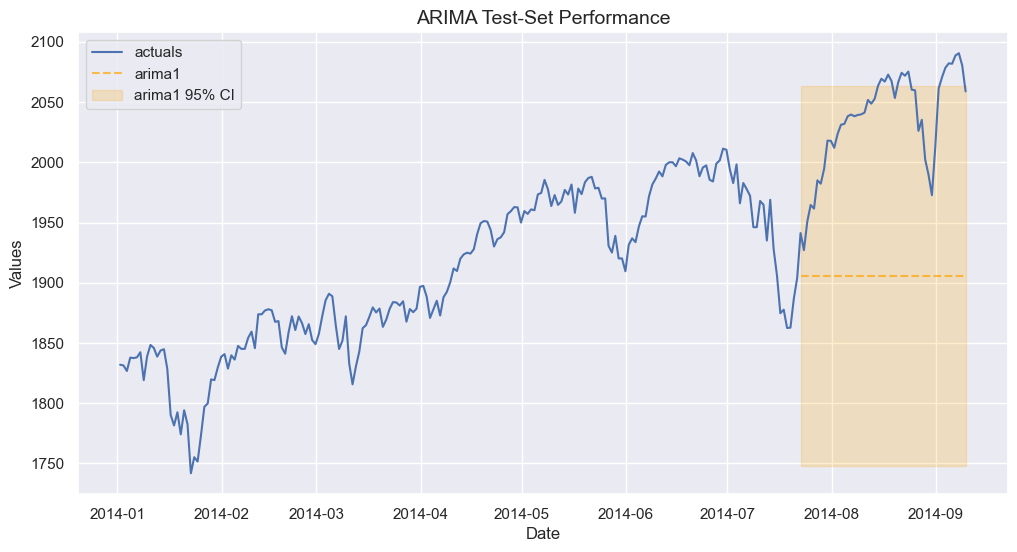

In [16]:
f.generate_future_dates(100) # 12-month forecast horizon
f.set_test_length(.2) # 20% test set
f.set_estimator('arima') # set arima
f.manual_forecast(call_me='arima1') # forecast with arima

f.plot_test_set(ci=True) # view test results
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

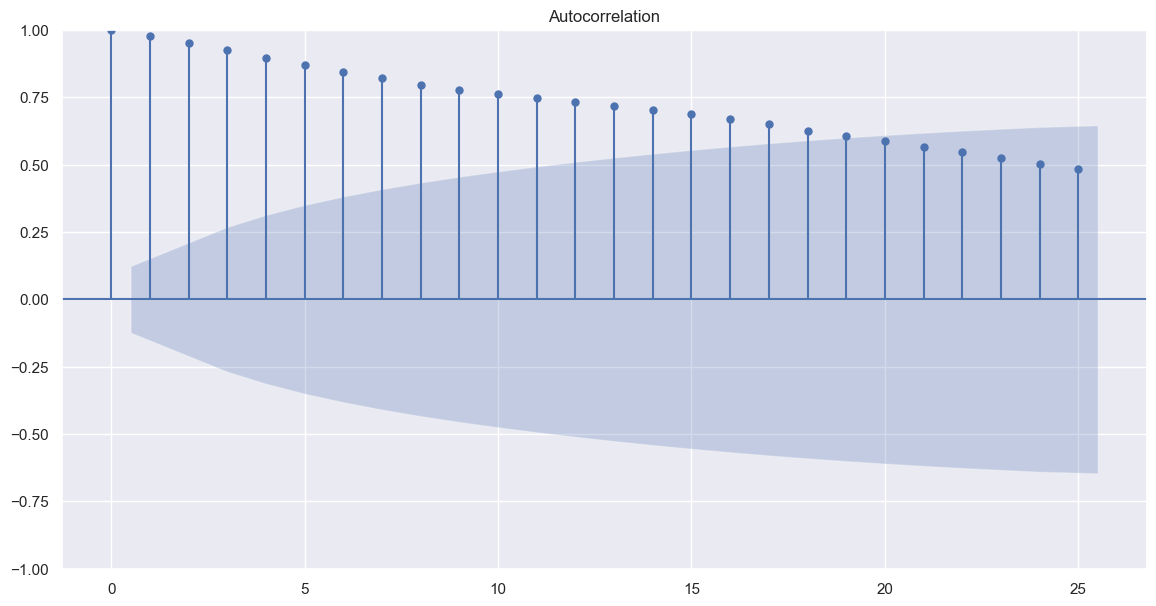

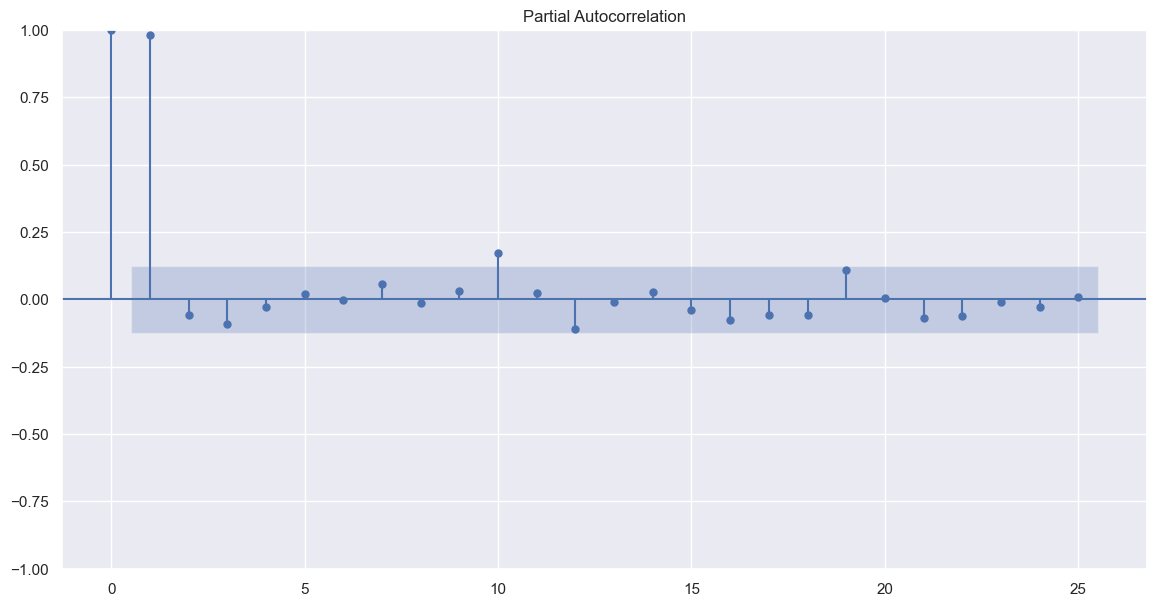

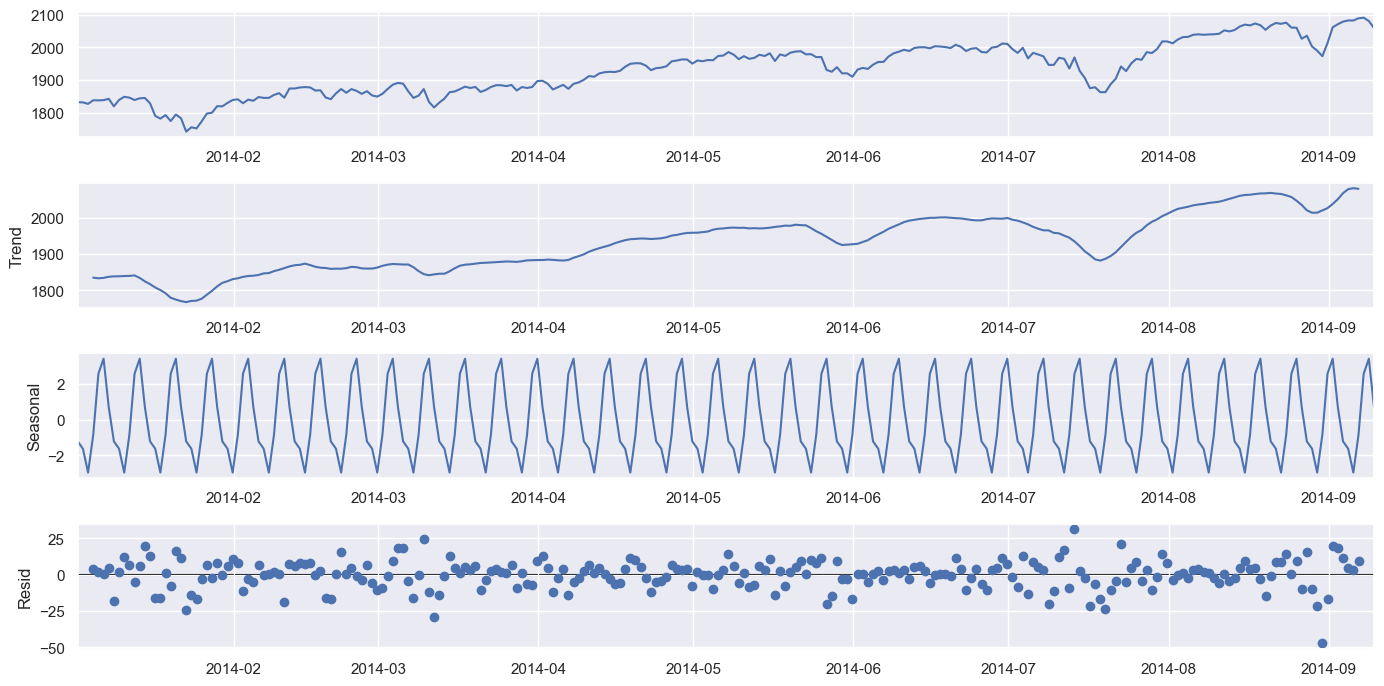

-1.1781145228671537
0.6829387358495682


In [17]:
# EDA
f.plot_acf()
plt.show()
f.plot_pacf()
plt.show()
f.seasonal_decompose().plot()
plt.show()
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

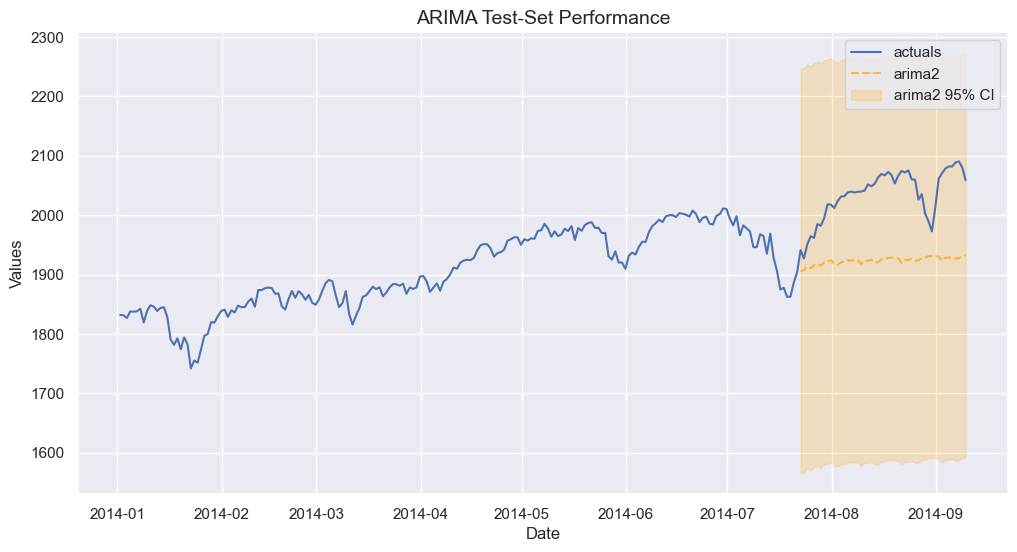

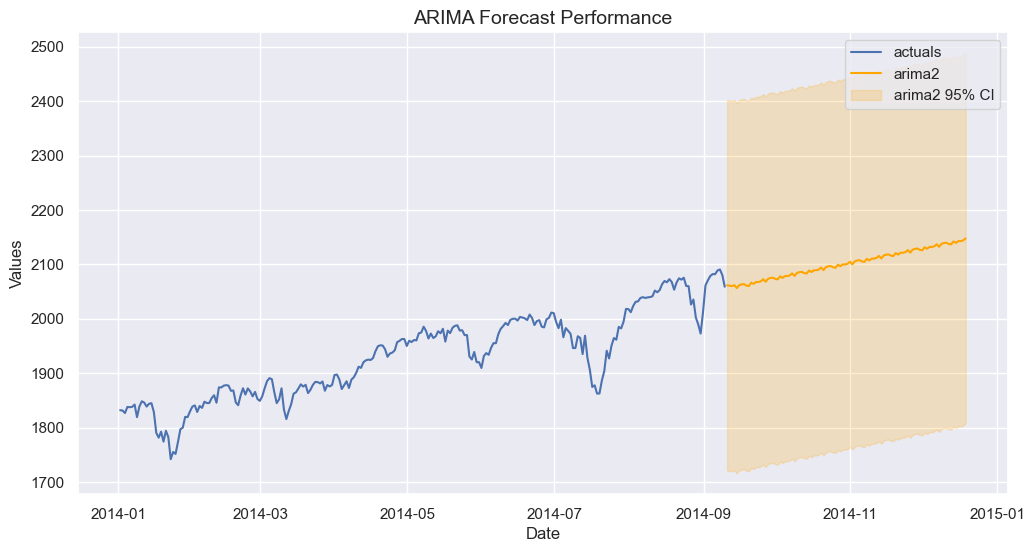

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  252
Model:             ARIMA(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -981.663
Date:                          Sun, 22 Oct 2023   AIC                           1977.326
Time:                                  11:11:01   BIC                           2001.661
Sample:                                       0   HQIC                          1987.132
                                          - 252                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2499      0.893      0.280      0.780      -1.501       2.001
ar.L2          0.0572      0.061      0.941      0.346      -0.062       0.176
ma.L1         -0.2306      0.886     -0.260      0.795      -1.966       1.505
ar.S.L12      -0.0407      0.100     -0.405      0.685      -0.238       0.156
ar.S.L24       0.0002      0.111      0.002      0.998      -0.217       0.217
ma.S.L12      -0.9985      4.035     -0.247      0.805      -8.907       6.910
sigma2       185.2348    738.913      0.251      0.802   -1263.009    1633.478
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.84
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.43   Skew:                            -0.21
Prob(H) (two-sided):                  0.11   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
# Forecast
f.manual_forecast(order=(2,1,1),seasonal_order=(2,1,1,12),call_me='arima2')

# View test results
f.plot_test_set(ci=True,models='arima2')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

# View forecast results
f.plot(ci=True,models='arima2')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

# See summary stats
f.regr.summary()

In [19]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [20]:
adf_test(special_data['Close'])

1. ADF :  -1.1781145228671537
2. P-Value :  0.6829387358495682
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 251
5. Critical Values :
	 1% :  -3.4566744514553016
	 5% :  -2.8731248767783426
	 10% :  -2.5729436702592023


In [21]:
stepwise_fit = auto_arima(special_data['Close'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  252
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1013.467
Date:                Sun, 22 Oct 2023   AIC                           2028.934
Time:                        11:11:01   BIC                           2032.460
Sample:                    01-01-2014   HQIC                          2030.353
                         - 09-09-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       188.2168     13.170     14.291      0.000     162.404     214.029
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                25.83
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.44   Skew:                            -0.39
Prob(H) (two-sided):                  0.10   Kurtosis:                         4.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
data_len = len(special_data)

In [23]:
train_len = data_len * 0.7
test_len = data_len - train_len

In [24]:
train_data = special_data.iloc[:int(train_len)]

In [25]:
test_data = special_data.iloc[int(train_len):int(train_len + test_len)]

In [26]:
test_data.Close

new_date
2014-06-26 19:00:00    1984.13
2014-06-27 19:00:00    1998.98
2014-06-28 19:00:00    2001.57
2014-06-29 19:00:00    2011.36
2014-06-30 19:00:00    2010.40
                        ...   
2014-09-05 19:00:00    2081.88
2014-09-06 19:00:00    2088.77
2014-09-07 19:00:00    2090.57
2014-09-08 19:00:00    2080.35
2014-09-09 19:00:00    2058.90
Name: Close, Length: 76, dtype: float64

In [27]:
train_data

,Close,Open,High,Low,Change %,Timestamp,new_index
new_date,,,,,,,
2014-01-01 19:00:00,1831.98,1845.86,1845.86,1827.74,-0.89%,01/02/2014,1.388578e+09
2014-01-02 19:00:00,1831.37,1833.21,1838.24,1829.13,-0.03%,01/03/2014,1.388664e+09
2014-01-03 19:00:00,1826.77,1832.31,1837.16,1823.73,-0.25%,01/06/2014,1.388750e+09
2014-01-04 19:00:00,1837.88,1828.71,1840.10,1828.71,0.61%,01/07/2014,1.388837e+09
2014-01-05 19:00:00,1837.49,1837.90,1840.02,1831.40,-0.02%,01/08/2014,1.388923e+09
...,...,...,...,...,...,...,...
2014-06-21 19:00:00,2001.54,2007.17,2007.17,1995.60,-0.31%,09/08/2014,1.403352e+09
2014-06-22 19:00:00,1988.44,2000.73,2001.01,1984.61,-0.65%,09/09/2014,1.403438e+09
2014-06-23 19:00:00,1995.69,1988.41,1996.66,1982.99,0.36%,09/10/2014,1.403525e+09


In [28]:
stepwise_fit = auto_arima(train_data.Close, 
                          seasonal=True, 
                          stepwise=False, suppress_warnings=True, 
                   error_action="ignore", max_order=None, trace=True)           

stepwise_fit.summary()

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=1368.545, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=1370.172, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=1371.893, Time=0.04 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=1373.154, Time=0.06 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=1374.113, Time=0.07 sec


 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=1375.963, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=1370.202, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=1372.707, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=1374.342, Time=0.10 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=1375.959, Time=0.13 sec
 ARIMA(1,1,5)(0,0,0)[1] intercept   : AIC=1377.920, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=1371.871, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=1372.489, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=1368.752, Time=0.26 sec
 ARIMA(2,1,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,1,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=1373.257, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=1373.993, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[1] interc

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  176
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -682.272
Date:                Sun, 22 Oct 2023   AIC                           1368.545
Time:                        11:11:08   BIC                           1374.874
Sample:                    01-01-2014   HQIC                          1371.112
                         - 06-25-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8775      1.012      0.867      0.386      -1.107       2.862
sigma2       142.5257     12.904     11.045      0.000     117.235     167.817
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):                37.67
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                            -0.85
Prob(H) (two-sided):                  0.06   Kurtosis:                         4.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

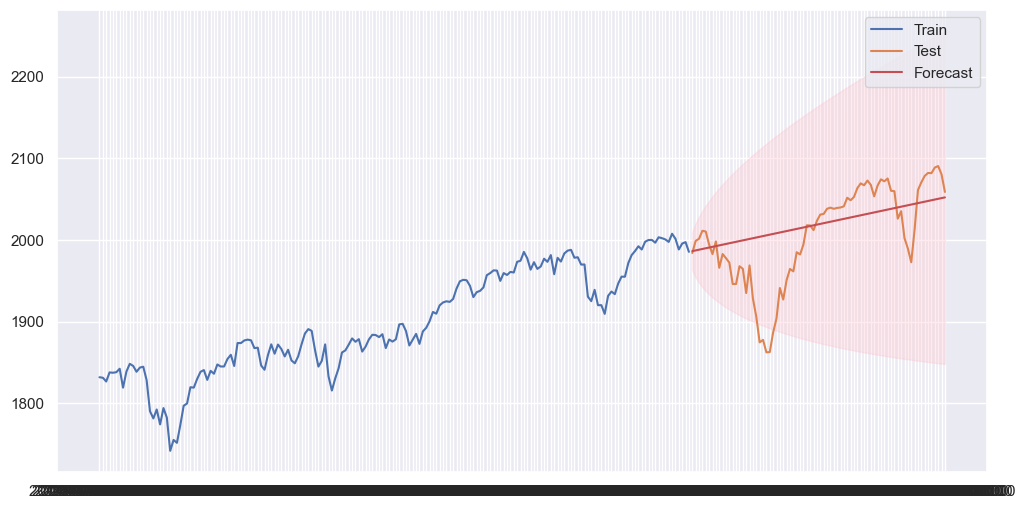

In [29]:
# Обучение модели с найденными оптимальными параметрами
stepwise_fit.fit(train_data.Close)

# Прогнозирование на тестовом наборе данных
forecast, conf_int = stepwise_fit.predict(n_periods=len(test_data), 
                                          return_conf_int=True)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data.Close, label='Train')
plt.plot(test_data.index, test_data.Close, label='Test')
plt.plot(test_data.index, forecast, label='Forecast', color='r')
plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

In [30]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(train_data.Close, order=(2, 1, 2))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  176
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -678.023
Date:                Sun, 22 Oct 2023   AIC                           1366.046
Time:                        11:11:09   BIC                           1381.870
Sample:                    01-01-2014   HQIC                          1372.464
                         - 06-25-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4264      0.010   -138.763      0.000      -1.447      -1.406
ar.L2         -0.9984      0.008   -121.123      0.000      -1.015      -0.982
ma.L1          1.4363      0.143     10.042      0.000       1.156       1.717
ma.L2          0.9962      0.190      5.233      0.000       0.623       1.369
sigma2       132.9404     29.522      4.503      0.000      75.079     190.802
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                33.61
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                            -0.87
Prob(H) (two-sided):                  0.08   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0, 0.5, 'Price')

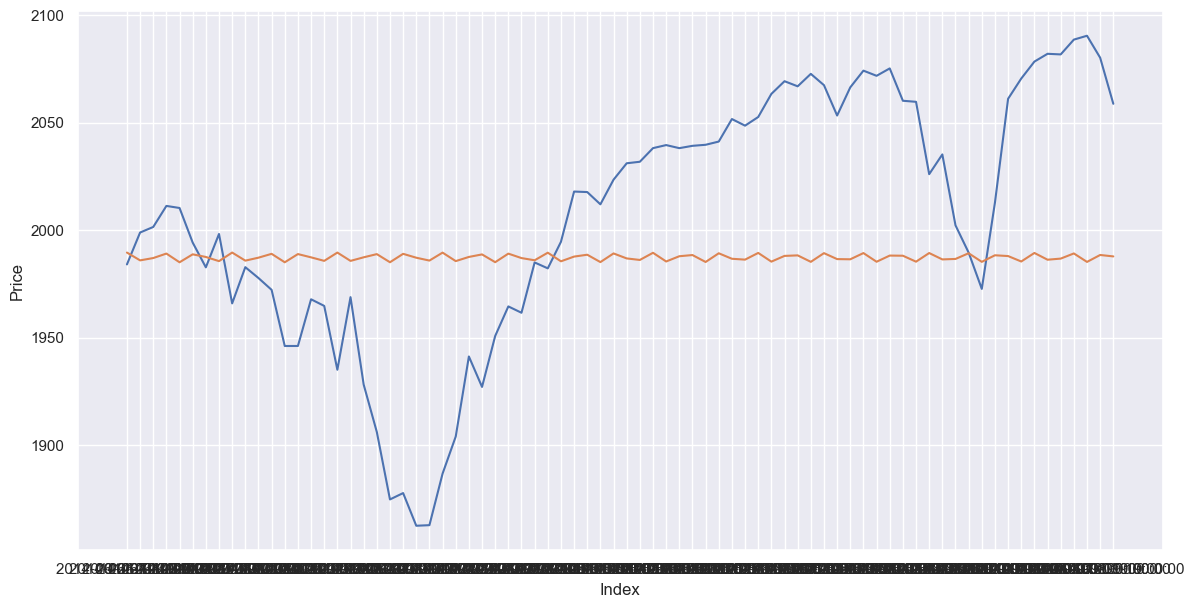

In [31]:
start=test_data.index[0]
end=test_data.index[len(test_data)-1]
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred = model.predict(start = start,end = end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, pred)
plt.xlabel('Index')
plt.ylabel('Price')

In [32]:
pred

2014-06-26 19:00:00    1989.649382
2014-06-27 19:00:00    1986.013761
2014-06-28 19:00:00    1987.097082
2014-06-29 19:00:00    1989.181436
2014-06-30 19:00:00    1985.126735
                          ...     
2014-09-05 19:00:00    1986.840309
2014-09-06 19:00:00    1989.239560
2014-09-07 19:00:00    1985.300176
2014-09-08 19:00:00    1988.524102
2014-09-09 19:00:00    1987.858313
Freq: D, Name: ARIMA predictions, Length: 76, dtype: float64

In [33]:
test = list()
temper = pd.DataFrame(train_data.Close)
for i in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(temper, order=(2, 1, 2))
    model = model.fit()
    start=test_data.index[i]
    end=test_data.index[len(test_data)-1]
    #if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
    #index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
    pred = model.predict(start = start,end = end,typ='levels').rename('ARIMA predictions')
    temper.loc[start] = pred[0]
    test.append(pred[0])

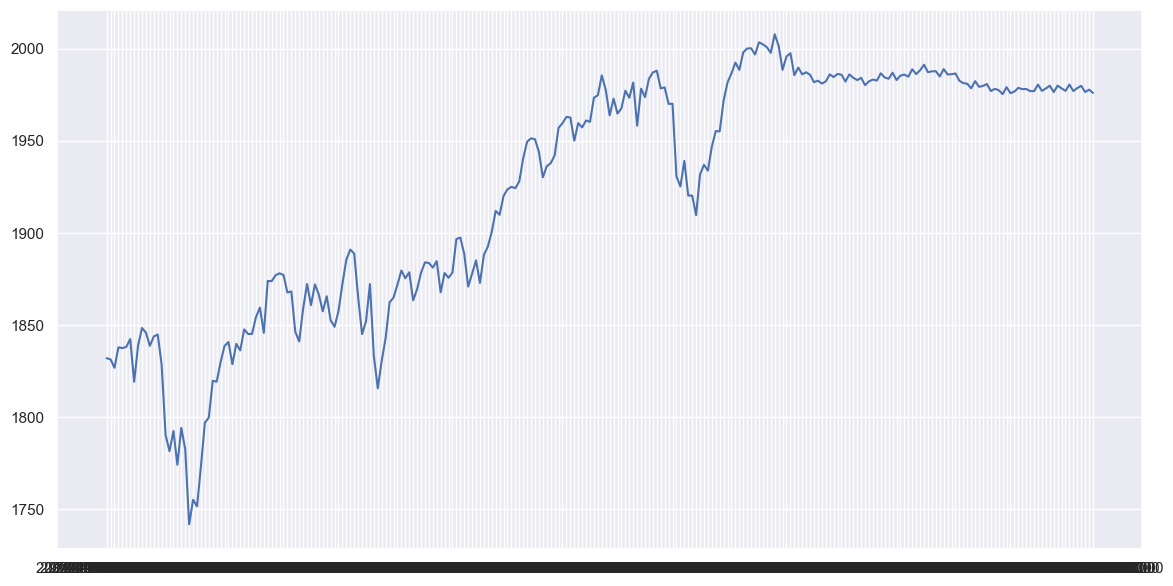

In [34]:
plt.plot(temper)

In [35]:
temper

,Close
new_date,
2014-01-01 19:00:00,1831.980000
2014-01-02 19:00:00,1831.370000
2014-01-03 19:00:00,1826.770000
2014-01-04 19:00:00,1837.880000
2014-01-05 19:00:00,1837.490000
...,...
2014-09-05 19:00:00,1978.536724
2014-09-06 19:00:00,1979.760048
2014-09-07 19:00:00,1976.424323


In [36]:
test

[1989.6493824176653,
 1985.9992902185872,
 1987.1061149420605,
 1985.7461387324922,
 1981.7285795629814,
 1982.530988042731,
 1980.9842409877233,
 1982.1383848624218,
 1985.9798998418178,
 1984.5232093072389,
 1986.212689309219,
 1985.781971211924,
 1982.0815534733674,
 1985.9612998476039,
 1984.1020186889305,
 1982.8739856966283,
 1984.0764620327693,
 1980.135486763163,
 1982.1881595670498,
 1983.1640559418543,
 1982.5913728786898,
 1986.5533729405195,
 1984.296417034065,
 1983.5886828890586,
 1986.8845232018132,
 1982.8896267748316,
 1985.3052459852381,
 1985.8407046662708,
 1984.733810728655,
 1988.732013555595,
 1986.14011465783,
 1988.1988823455965,
 1991.1912219005674,
 1987.1626644415003,
 1987.6130216934184,
 1987.6818581800203,
 1984.8252341074044,
 1988.8207637800883,
 1985.9696454431603,
 1986.0315693448354,
 1986.47631763191,
 1982.5064923213067,
 1981.2175026124494,
 1980.8943432892354,
 1978.4118201794358,
 1982.2858768432739,
 1979.2255629715046,
 1979.7083105742831,
 19

In [37]:
test_data

,Close,Open,High,Low,Change %,Timestamp,new_index
new_date,,,,,,,
2014-06-26 19:00:00,1984.13,1986.04,1987.18,1978.48,-0.07%,09/15/2014,1.403784e+09
2014-06-27 19:00:00,1998.98,1981.93,2002.28,1979.06,0.75%,09/16/2014,1.403870e+09
2014-06-28 19:00:00,2001.57,1999.30,2010.74,1993.29,0.13%,09/17/2014,1.403957e+09
2014-06-29 19:00:00,2011.36,2003.07,2012.34,2003.07,0.49%,09/18/2014,1.404043e+09
2014-06-30 19:00:00,2010.40,2012.74,2019.26,2006.59,-0.05%,09/19/2014,1.404130e+09
...,...,...,...,...,...,...,...
2014-09-05 19:00:00,2081.88,2083.25,2087.56,2081.86,-0.01%,12/24/2014,1.409918e+09
2014-09-06 19:00:00,2088.77,2084.30,2092.70,2084.30,0.33%,12/26/2014,1.410005e+09
2014-09-07 19:00:00,2090.57,2087.63,2093.55,2085.75,0.09%,12/29/2014,1.410091e+09


Performing stepwise search to minimize aic
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=1617.831, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1610.527, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1611.941, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1611.905, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1608.676, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1611.103, Time=0.06 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1611.063, Time=0.05 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1613.063, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1611.608, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1611.608, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1613.606, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 0.750 seconds


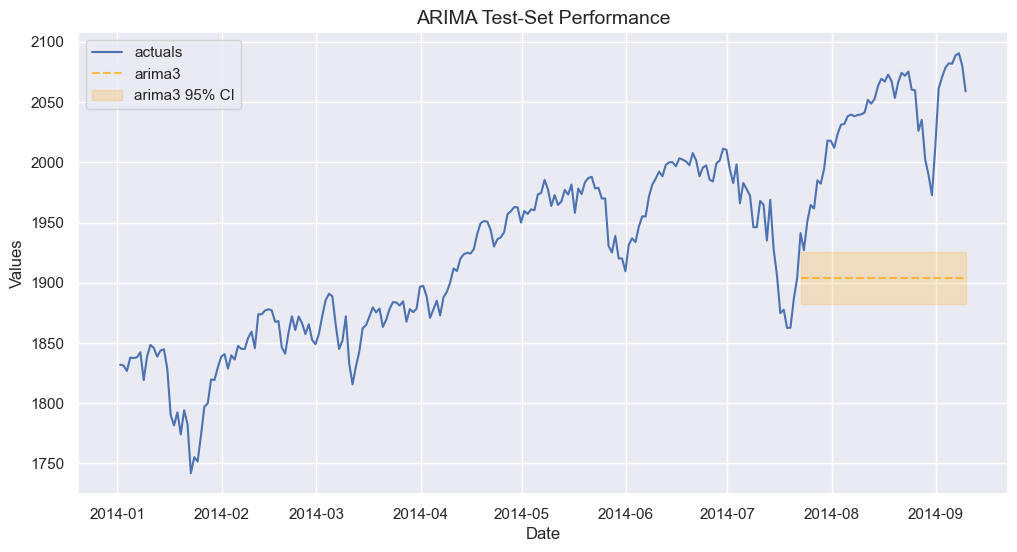

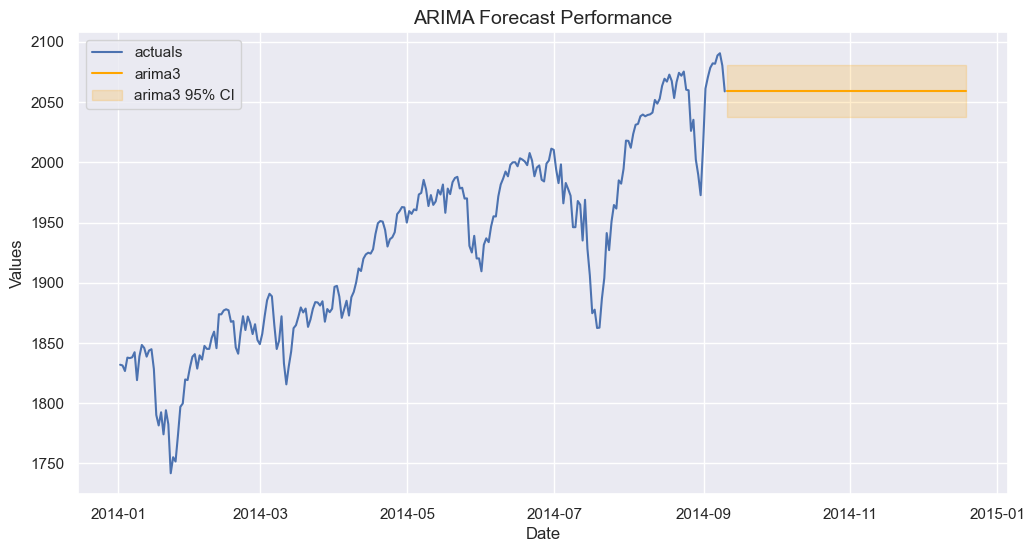

In [38]:
from scalecast.auxmodels import auto_arima

auto_arima(
    f,
    start_P=1,
    start_q=1,
    max_p=6,
    max_q=6,
    m=12,
    seasonal=True,
    max_P=2, 
    max_D=2,
    max_Q=2,
    max_d=2,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    information_criterion="aic",
    alpha=0.05,
    scoring='mse',
    call_me='arima3',
)

f.plot_test_set(ci=True,models='arima3')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

f.plot(ci=True,models='arima3')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [39]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  252
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1013.467
Date:                Sun, 22 Oct 2023   AIC                           2028.934
Time:                        11:11:24   BIC                           2032.460
Sample:                             0   HQIC                          2030.353
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       188.2168     13.170     14.291      0.000     162.404     214.029
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                25.83
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.44   Skew:                            -0.39
Prob(H) (two-sided):                  0.10   Kurtosis:                         4.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

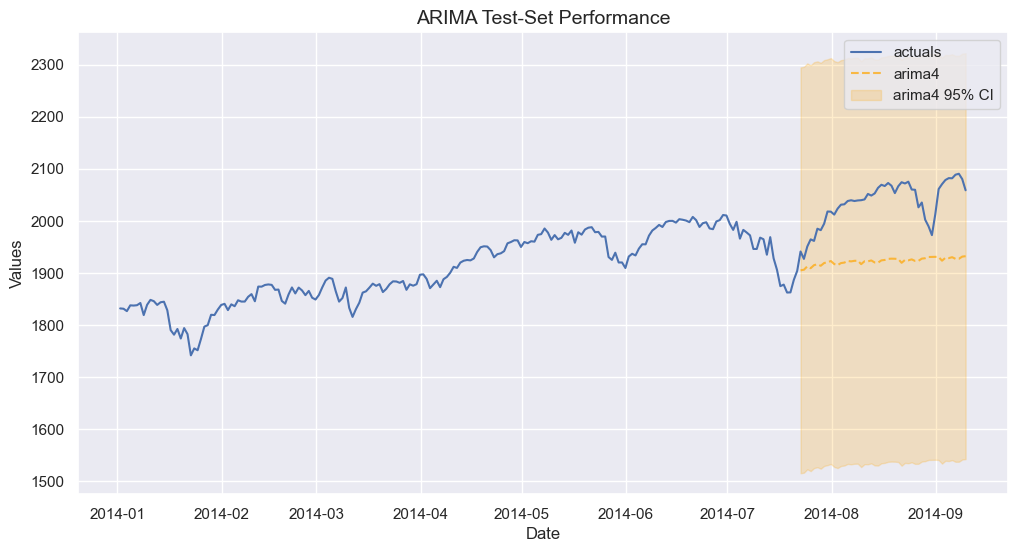

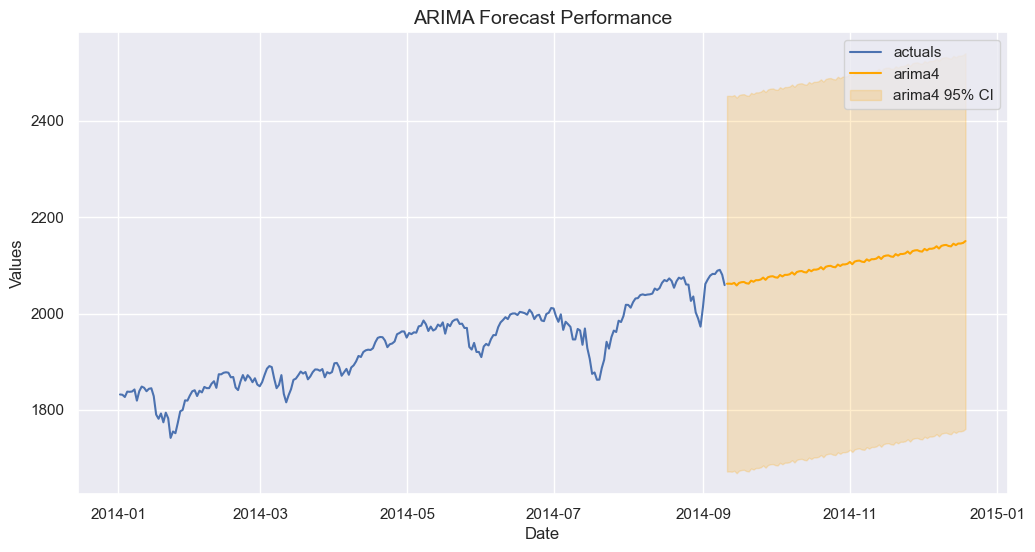

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  252
Model:             ARIMA(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -981.970
Date:                          Sun, 22 Oct 2023   AIC                           1975.941
Time:                                  11:11:32   BIC                           1996.800
Sample:                                       0   HQIC                          1984.346
                                          - 252                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5171      0.794      0.651      0.515      -1.040       2.074
ma.L1         -0.4787      0.804     -0.595      0.552      -2.055       1.098
ar.S.L12      -0.0383      0.093     -0.414      0.679      -0.220       0.143
ar.S.L24       0.0008      0.110      0.007      0.994      -0.214       0.216
ma.S.L12      -0.9794      0.284     -3.447      0.001      -1.536      -0.422
sigma2       189.0783     47.996      3.940      0.000      95.009     283.148
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                13.72
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               1.46   Skew:                            -0.25
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
f.set_validation_length(12)
grid = {
    'order':[(1,1,1),(1,1,0),(0,1,1)],
    'seasonal_order':[(2,1,1,12),(1,1,1,12),(2,1,0,12),(0,1,0,12)]
}

f.ingest_grid(grid)
f.tune()
f.auto_forecast(call_me='arima4')

f.plot_test_set(ci=True,models='arima4')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

f.plot(ci=True,models='arima4')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

f.regr.summary()

In [41]:
pd.options.display.max_colwidth = 100
results = f.export(to_excel=True,
                   excel_name='arima_results.xlsx',
                   determine_best_by='TestSetMAPE')

In [42]:
summaries = results['model_summaries']
summaries[
    [
         'ModelNickname',
         'HyperParams',
         'InSampleMAPE',
         'TestSetMAPE'
    ]
]

,ModelNickname,HyperParams,InSampleMAPE,TestSetMAPE
0,arima2,"{'order': (2, 1, 1), 'seasonal_order': (2, 1, 1, 12)}",0.011693,0.054622
1,arima4,"{'order': (1, 1, 1), 'seasonal_order': (2, 1, 1, 12)}",0.011691,0.054932
2,arima1,{},0.035401,0.063327
3,arima3,"{'order': (0, 1, 0), 'seasonal_order': (0, 0, 0, 12), 'trend': None}",0.009207,0.064131
